**Mount colab notebook to Drive**

In [1]:
# Mounting colab notebook to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Downloading gplearn and relevant packages*

In [2]:
# Installing gplearn
# https://gplearn.readthedocs.io/en/stable/installation.html
!pip install gplearn

*Importing relevant modules/functions*

In [3]:
# Importing relevant modules
from gplearn.genetic import SymbolicRegressor
import matplotlib as plt
import numpy as np
import pandas as pd
import os
import time

#Configuring matplotlib
%matplotlib inline
plt.style.use('seaborn-whitegrid')

<ipython-input-3-a6539cd4f5be>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


*Verify working directory and data file name*

In [4]:
input_path = '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/benchmark'
os.chdir(input_path)
!pwd
data_path = '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/benchmark/tegmark_data/'
data_file = 'I_9_18_short.txt'

/content/drive/My Drive/Symbolic-Regressor/Feynman Local/benchmark


*Obtaining data from text file, plotting selected variables (optional) and running symbolic regression with time measurements*

In [5]:
#Converting raw data in .txt file to lists compatible with gplearn
os.chdir(data_path)
x_values = []
y_values = []
with open(data_path + data_file, 'r+') as f:
    for row in f:
        x_values.append([float(x) for x in row.split()])

for arr in x_values:
    y_values.append(arr[-1])
    del arr[-1]


            0         1         2         3         4         5         6   \
0     1.871306  1.003448  1.457340  3.927323  1.033890  3.251673  1.911587   
1     1.808360  1.888191  1.170008  3.946069  1.158681  3.321796  1.898950   
2     1.314030  1.134116  1.584234  3.954173  1.903237  3.244628  1.581030   
3     1.154981  1.811111  1.762036  3.488383  1.623759  3.377847  1.927394   
4     1.548680  1.151361  1.966489  3.247347  1.466371  3.907989  1.815357   
...        ...       ...       ...       ...       ...       ...       ...   
9995  1.572770  1.902704  1.848881  3.381485  1.838028  3.937142  1.655070   
9996  1.708609  1.307624  1.629539  3.885819  1.120253  3.891999  1.514125   
9997  1.646805  1.079485  1.946540  3.551666  1.618695  3.997918  1.944918   
9998  1.346033  1.779222  1.007424  3.094174  1.189818  3.605732  1.521890   
9999  1.535699  1.356945  1.869351  3.682101  1.707201  3.448188  1.614767   

            7         8         9   10  
0     3.531640  1.4131

<Axes: xlabel='1', ylabel='9'>

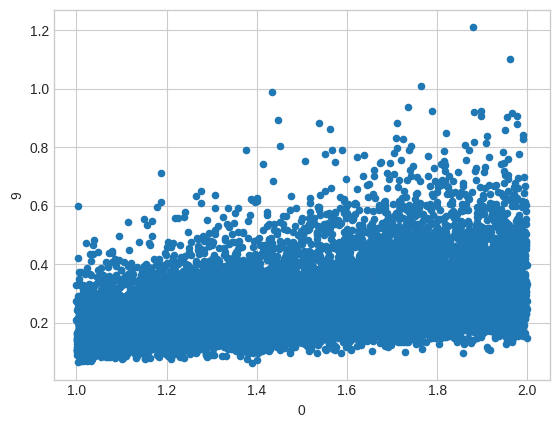

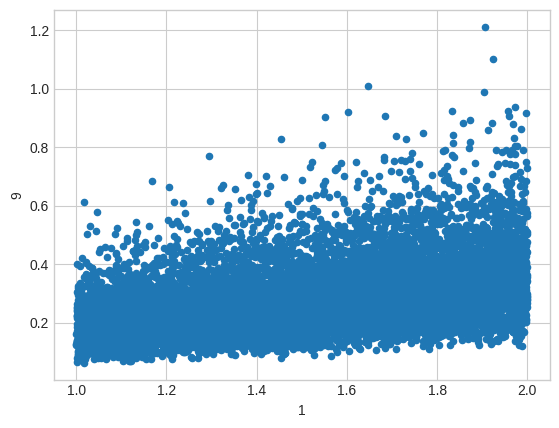

In [6]:
# Printing out generated data with Pandas and plotting it with matplotlib (optional)
os.chdir(data_path)
df=pd.read_csv(data_path + data_file,sep=" ",header=None)
print(df)

# Manually edit and run upon printing data and noting number of 'x' and 'y' variables. Aids in detection of potential noise

df.plot.scatter(x=0, y=9)
df.plot.scatter(x=1, y=9)


In [7]:
# Running gplearn symbolic regression on data with time measurements
os.chdir(input_path)
start_time = time.time()
est_gp = SymbolicRegressor(population_size=1000,
                           generations=20, stopping_criteria=0.001,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(x_values, y_values)
print(est_gp._program)
print(time.time() - start_time)

# The smaller the dataset, population_size can be increased. Only population size (def. 1000) and generations (def. 20) are changed from default settings.
# https://github.com/trevorstephens/gplearn/blob/master/gplearn/genetic.py

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    27.87          859.152        7        0.0836088        0.0855591      1.55m
   1     7.32          1.42764        9        0.0769962        0.0807316     52.69s
   2     4.64          1.40864        7        0.0711876        0.0762824      1.69m
   3     3.36          1.32039        5        0.0879171        0.0918566     42.34s
   4     2.46         0.646659        1        0.0927236         0.101687     19.45s
   5     1.34         0.361173        1        0.0928502         0.100548     16.77s
   6     1.29         0.601573        1        0.0927456         0.101489     16.56s
   7     1.38         0.441659        1        0.0929174        0.0999428     13.79s
   8     1.49         0.564198        1        0.0925196         0.103524  